# Predicting Customer Attrition for ***`Loblaws Digital`***

### A Data Science Approach to Retaining Customers

Presented By **`Group 3:`**
                    
 ###               ***`Thompson, Tavleen & Sachin`*** 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
data = pd.read_excel("Book1.xlsx",sheet_name='E Comm')

# Display the first few rows of the dataset
display(data.head())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# Check for missing values
print(data.isnull().sum())

# Impute missing values
# For numerical columns, use median imputation
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# For categorical columns, use mode imputation
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Gender']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify if there are any remaining missing values
print(data.isnull().sum())

# Encode categorical variables
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp         

In [5]:
# Save the cleaned dataset
data.to_csv('cleaned_Loblaws_Book1.csv', index=False)

## Exploratory Data Analysis (EDA)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,0.928419,1.654707,15.566785,3.548135,0.601066,2.934636,3.688988,2.369627,3.066785,1.168384,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.709822,0.915389,8.345961,1.389659,0.489723,0.705528,1.023999,1.411435,1.380194,0.664344,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,0.000000,1.000000,9.000000,3.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,1.000000,14.000000,4.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,1.000000,3.000000,20.000000,4.000000,1.000000,3.000000,4.000000,4.000000,4.000000,2.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,2.000000,3.000000,127.000000,6.000000,1.000000,5.000000,6.000000,5.000000,5.000000,2.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


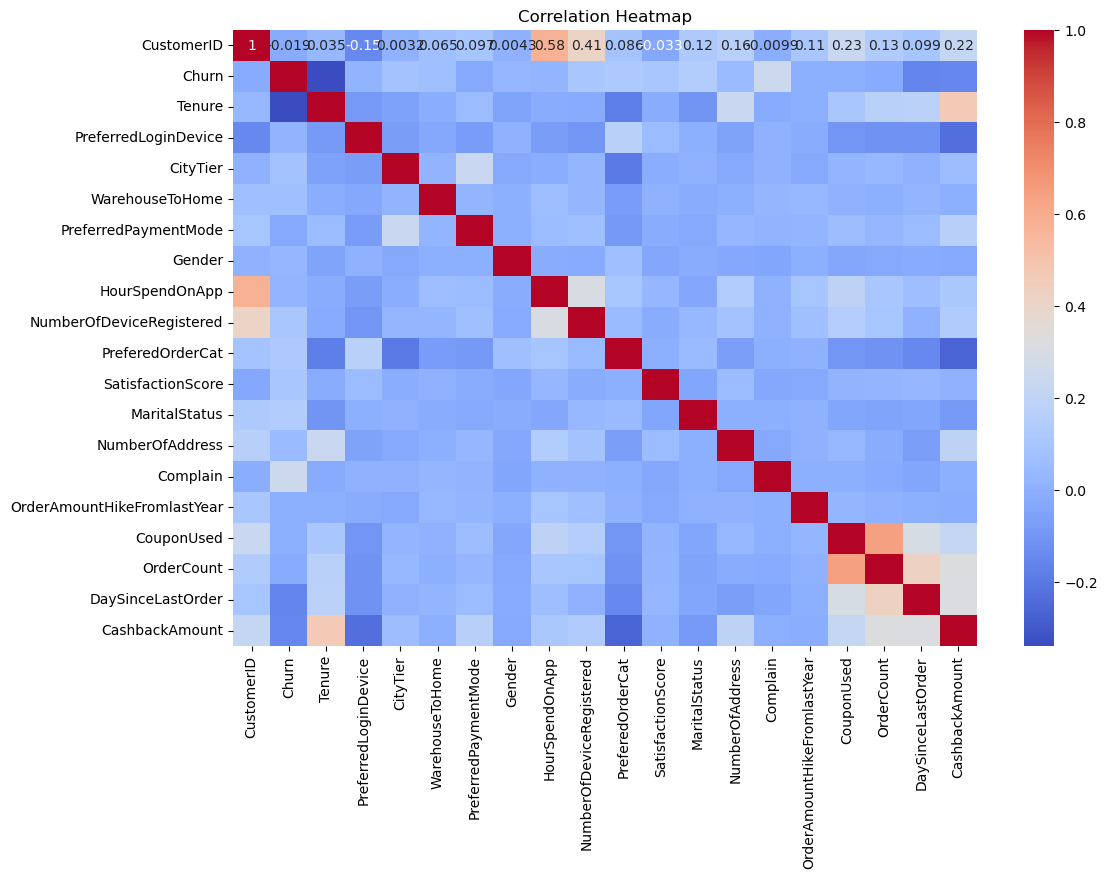

In [6]:
# Summary statistics
display(data.describe())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

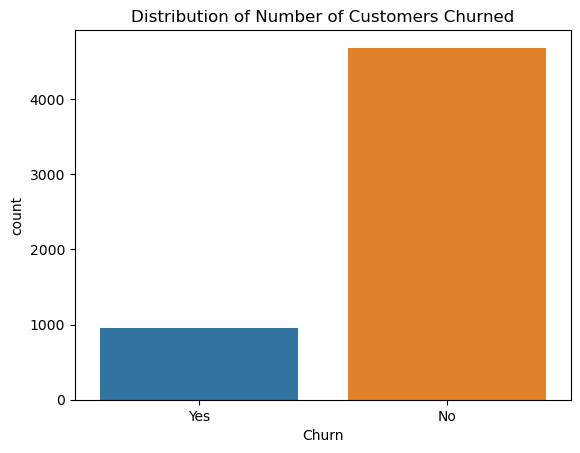

In [7]:
# Distribution of Churn with alias names in the plot only
sns.countplot(x=data['Churn'].replace({0: 'No', 1: 'Yes'}))
plt.title('Distribution of Number of Customers Churned')
plt.xlabel('Churn')  # Setting the x-axis label
plt.show()

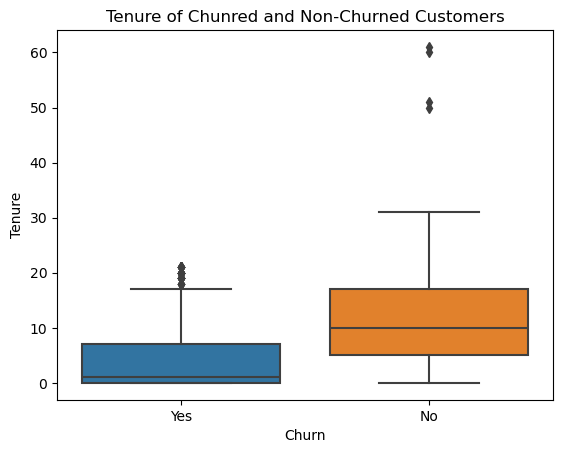

In [8]:

# Boxplot of Tenure vs Churn

sns.boxplot(x=data['Churn'].replace({0: 'No', 1: 'Yes'}), y='Tenure', data=data)
plt.title('Tenure of Chunred and Non-Churned Customers')
plt.show()


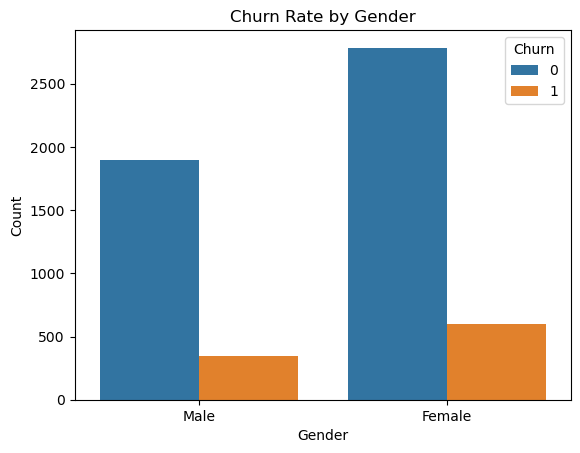

In [9]:
# Countplot of Churn rate based on Gender
sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# If you need to rename or explicitly mention gender names, you can do so here
# For example, if your data uses 'M' and 'F', you can rename them to 'Male' and 'Female'
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

plt.show()

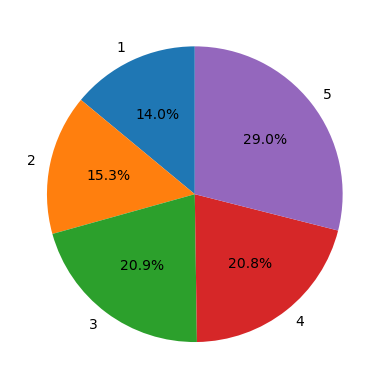

In [10]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

# Group by 'SatisfactionScore' and calculate the churn rate
churn_rate_by_satisfaction = data.groupby('SatisfactionScore')['Churn'].mean() * 100

# Plot
churn_rate_by_satisfaction.plot(kind='pie', color='skyblue', autopct='%1.1f%%', startangle=90)
#plt.title('Churn Rate by Satisfaction Score')
#plt.xlabel('Satisfaction Score')
#plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.xlabel('')  # Remove the x-axis label
plt.ylabel('')  # Remove the y-axis label
plt.show()

## Building the Predictive Mode

### Random Forest Classifier

In [13]:
# Define feature variables (X) and target variable (y)
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a Random Forest Classifier
model_rand = RandomForestClassifier(n_estimators=100, random_state=42)
model_rand.fit(X_train, y_train)

# Make predictions
y_pred_rand = model_rand.predict(X_test)

### Confusion Matrix

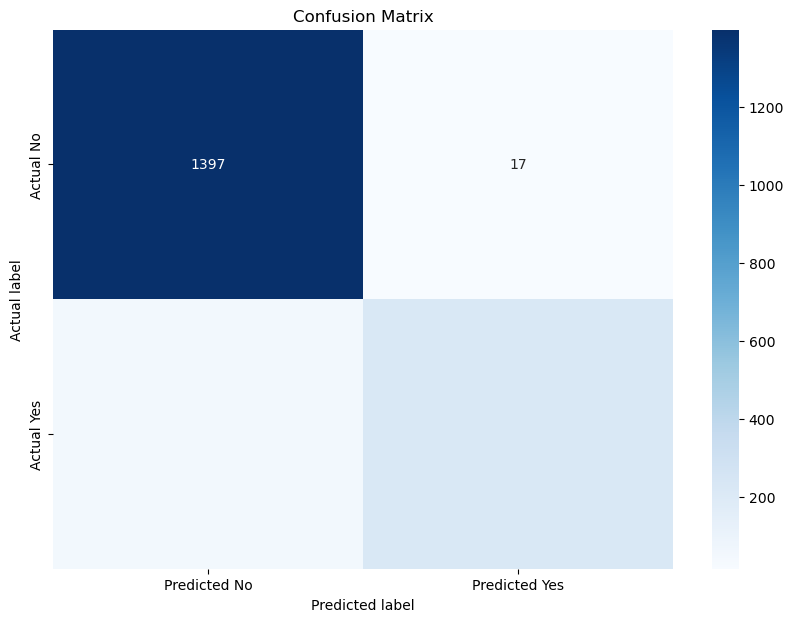

                        Feature  Importance
0                        Tenure    0.226042
17               CashbackAmount    0.104241
3               WarehouseToHome    0.076919
12                     Complain    0.065069
11              NumberOfAddress    0.063356
16            DaySinceLastOrder    0.061499
13  OrderAmountHikeFromlastYear    0.058463
9             SatisfactionScore    0.049362
4          PreferredPaymentMode    0.040291
10                MaritalStatus    0.036877
8              PreferedOrderCat    0.036423
7      NumberOfDeviceRegistered    0.035947
15                   OrderCount    0.031211
14                   CouponUsed    0.028118
2                      CityTier    0.025768
1          PreferredLoginDevice    0.024565
6                HourSpendOnApp    0.018487
5                        Gender    0.017362


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rand)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Feature Importance
feature_importances = model_rand.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

### Precison - Recall Curve

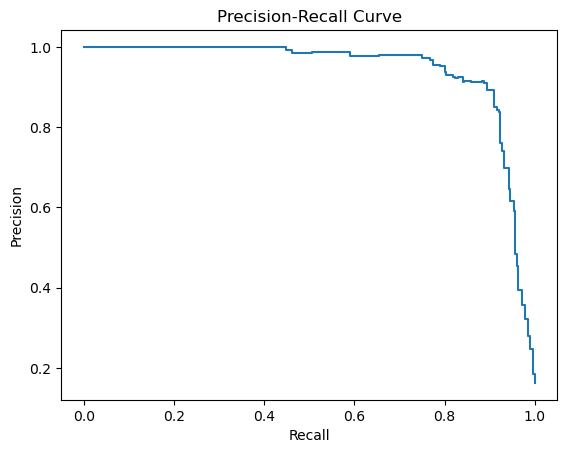

In [15]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# y scores

y_scores_rand = model_rand.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_rand)

# Plotting the Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Step 3: Train the model
gb_clf.fit(X_train, y_train)

y_pred_grd = gb_clf.predict(X_test)


### Confusion Matrix

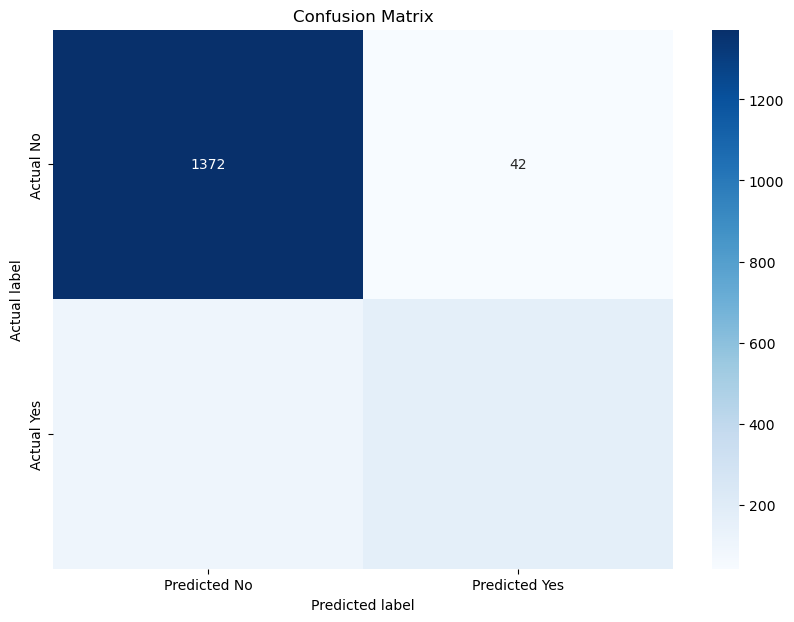

                        Feature  Importance
0                        Tenure    0.446060
12                     Complain    0.119079
11              NumberOfAddress    0.083705
17               CashbackAmount    0.083468
3               WarehouseToHome    0.042422
16            DaySinceLastOrder    0.041658
10                MaritalStatus    0.034202
9             SatisfactionScore    0.028917
8              PreferedOrderCat    0.024730
13  OrderAmountHikeFromlastYear    0.018294
14                   CouponUsed    0.017064
7      NumberOfDeviceRegistered    0.015940
2                      CityTier    0.014538
15                   OrderCount    0.009586
1          PreferredLoginDevice    0.007878
4          PreferredPaymentMode    0.006789
5                        Gender    0.003367
6                HourSpendOnApp    0.002300


In [19]:
cm_new = confusion_matrix(y_test, y_pred_grd)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Feature Importance
feature_importances = gb_clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

### Precison Recall Curve

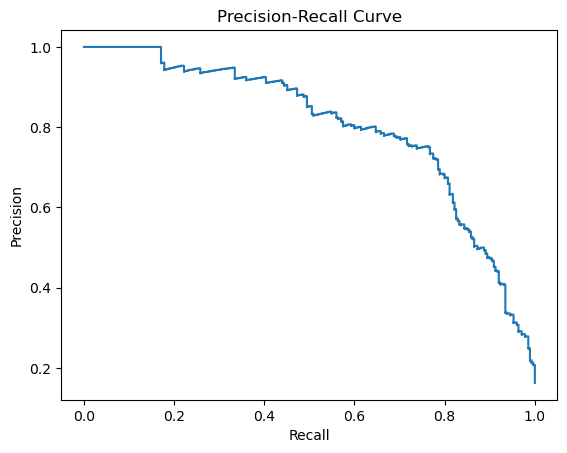

In [22]:
# Correcting the typo in the method name
y_scores_grd = gb_clf.predict_proba(X_test)[:, 1]
precision_new, recall_new, thresholds_new = precision_recall_curve(y_test, y_scores_grd)

# Plotting the Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision_new, recall=recall_new)
disp.plot()

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()